In [1]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


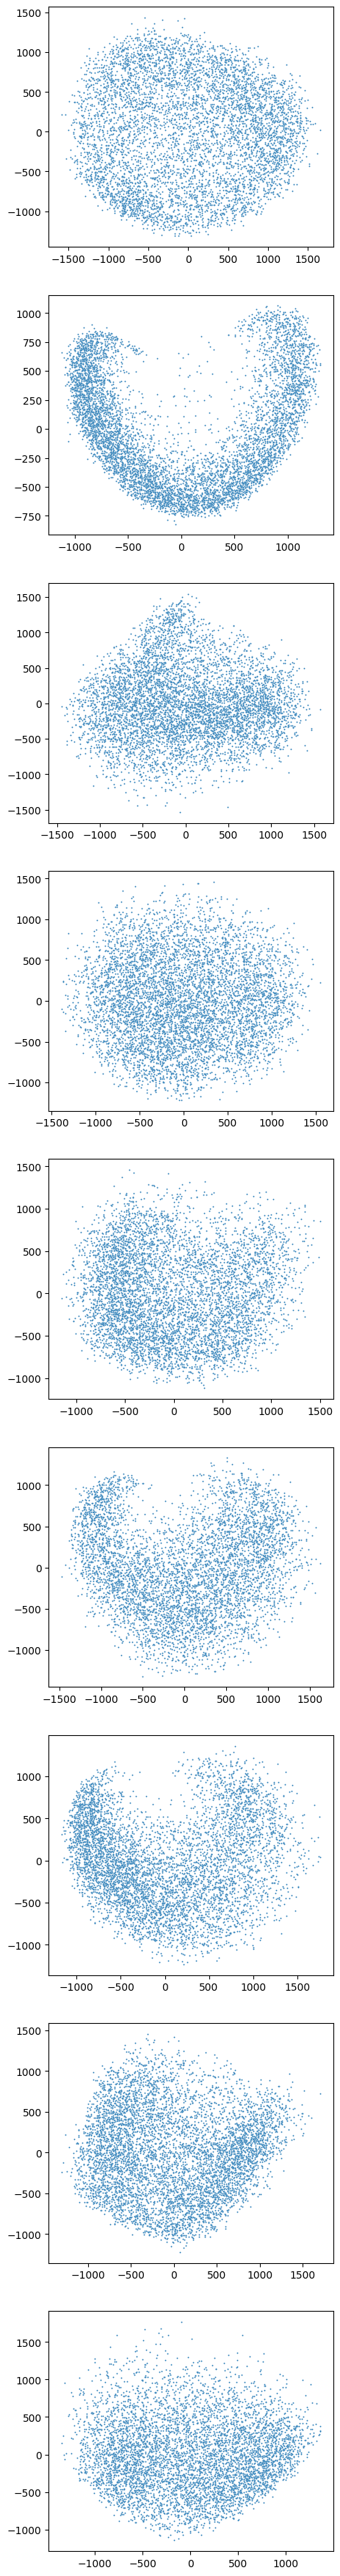

In [70]:
from sklearn.decomposition import PCA
fig,axs=plt.subplots(9,1,figsize=(5,45))
axs.ravel()
for i in range(9):
    set=sets[i]
    #print(set.shape)
    function= lambda x: x.flatten()
    flat= np.array(list(map(function,set)))
    #print(flat.shape)
    pca = PCA()
    transformed_data=pca.fit_transform(flat)
    sns.scatterplot(x=transformed_data[:,0],y=transformed_data[:,1],ax=axs[i],s=2)

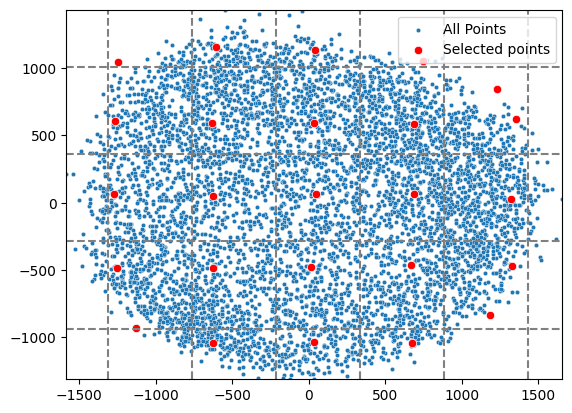

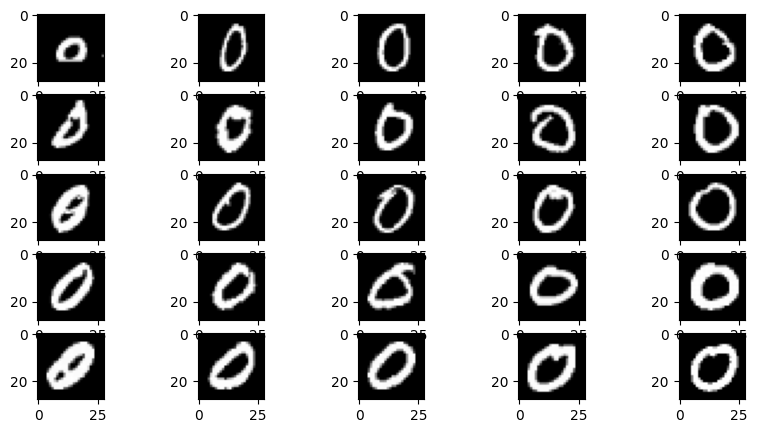

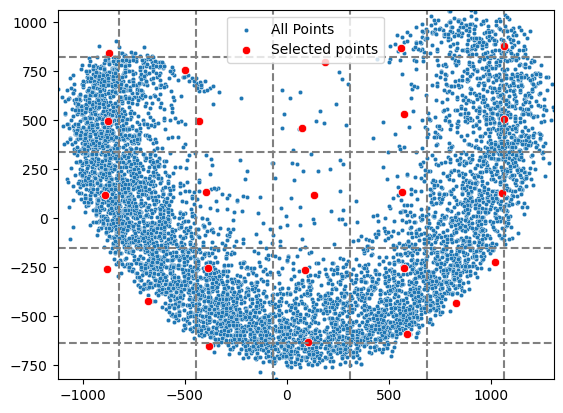

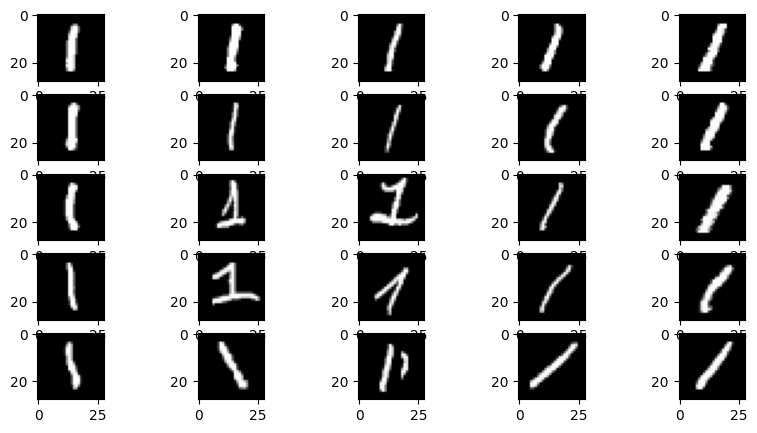

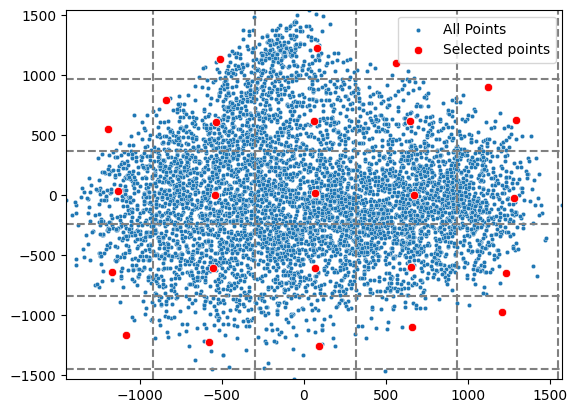

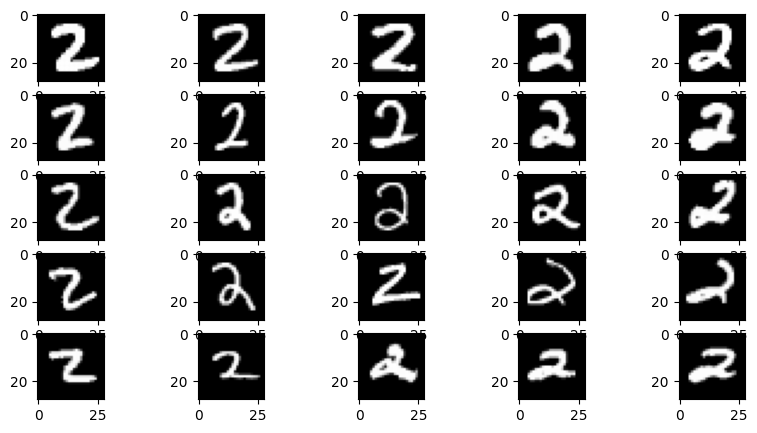

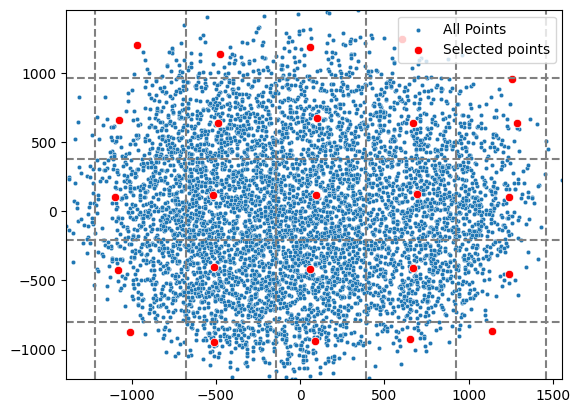

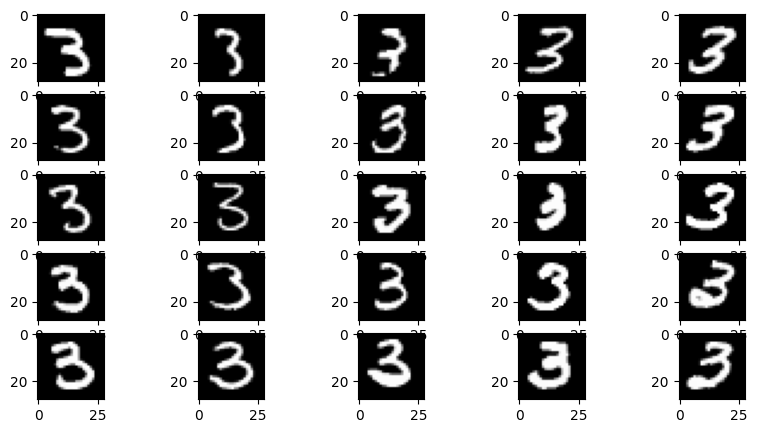

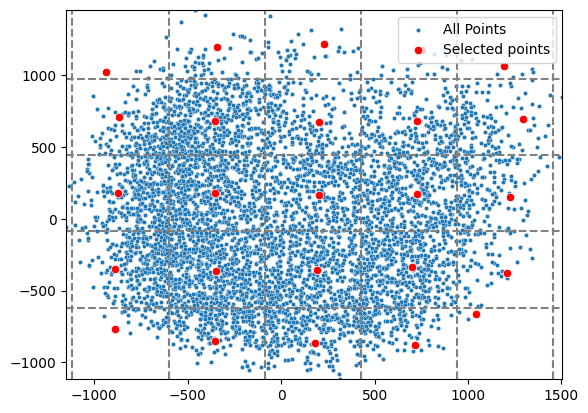

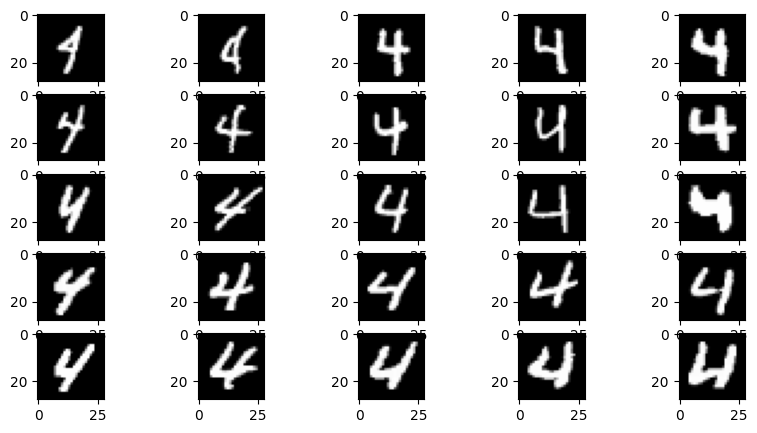

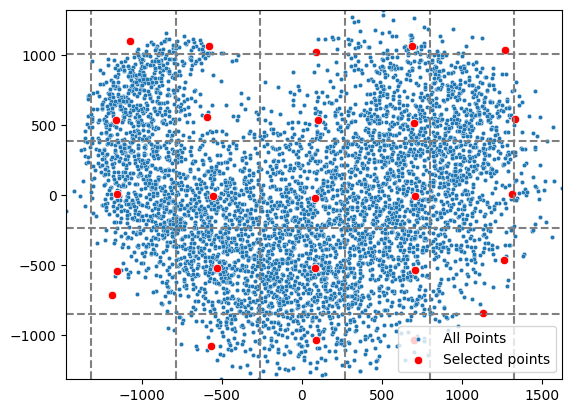

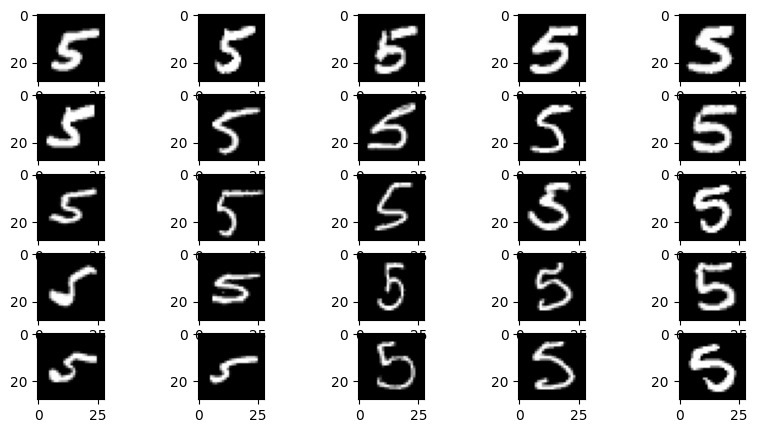

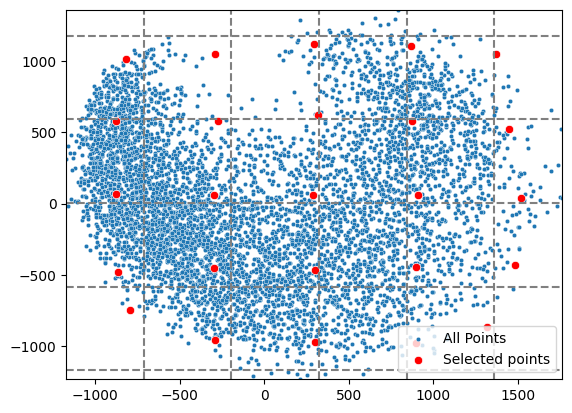

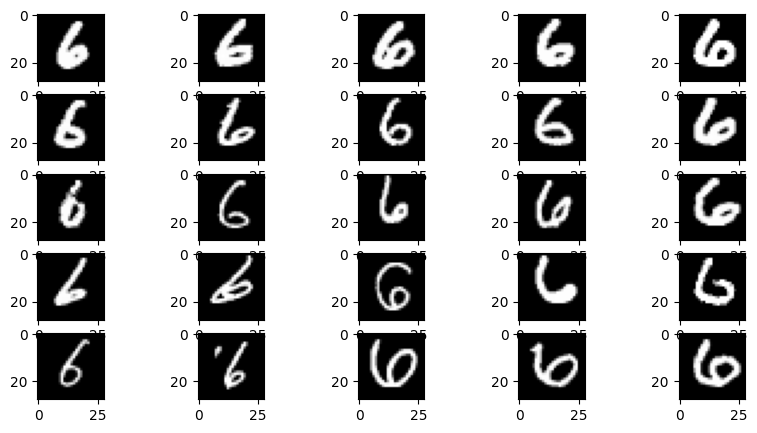

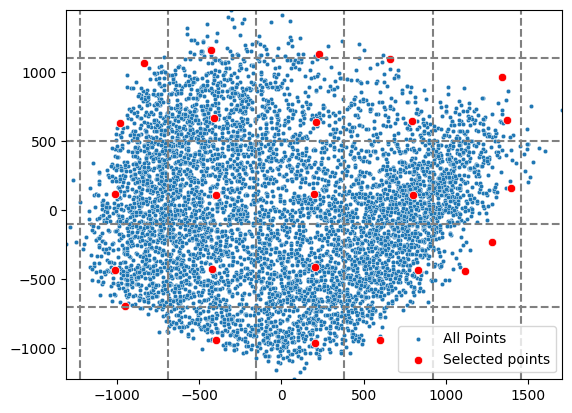

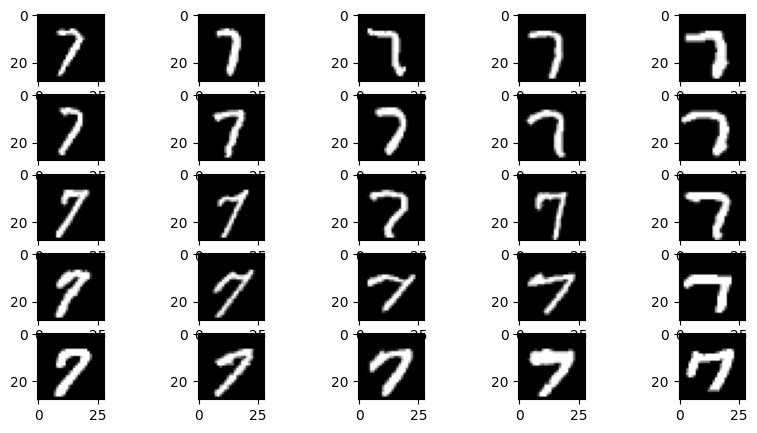

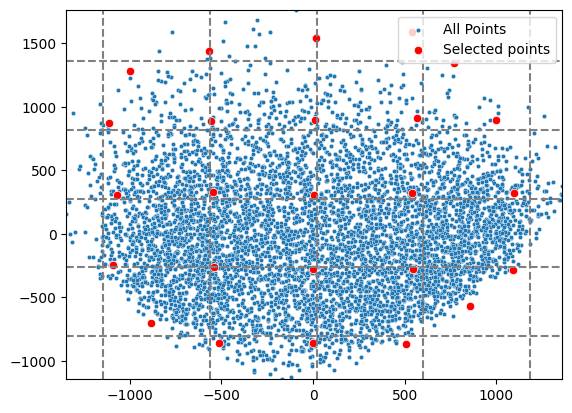

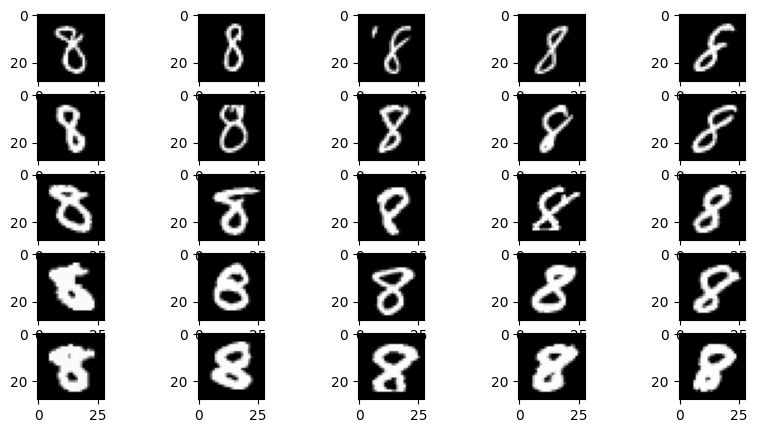

In [114]:
for set in sets:
    
    function= lambda x: x.flatten()
    
    flat= np.array(list(map(function,set)))
    pca = PCA(n_components=2)
    transformed_data=pca.fit_transform(flat)
    x = transformed_data[:,0] #PC1
    y = transformed_data[:,1] #PC2
    
    
    
    # Assuming `points` is a 2D numpy array where each row is a point
    
    # Create a 5x5 grid
    x_grid = np.linspace(x.min(), x.max(), 6)
    y_grid = np.linspace(y.min(), y.max(), 6)
    
    # Store the selected points
    selected_points = []
    
    # Loop over the grid and find the closest point to the center of each cell
    closest_point_indices=[]
    for j in range(5):
        for i in range(5):
            x_center = (x_grid[i] + x_grid[i+1]) / 2
            y_center = (y_grid[j] + y_grid[j+1]) / 2
            distances = np.sqrt((x - x_center)**2 + (y - y_center)**2)
            closest_point_index = np.argmin(distances)
            closest_point_indices.append(closest_point_index)
            selected_points.append(transformed_data[closest_point_index])
    
    # Convert the list to a numpy array
    selected_points = np.array(selected_points)
    for i in range(6):
        plt.axhline(x_grid[i],ls='--',c='gray')
        plt.axvline(y_grid[i],ls='--',c='gray')
    
    # Plot all points
    sns.scatterplot(x=x,y=y,s=10,label="All Points")
    
    # Plot the selected points
    sns.scatterplot(x=selected_points[:, 0],y= selected_points[:, 1], color='red', label='Selected points')
    plt.xlim(x.min(),x.max())
    plt.ylim(y.min(),y.max())
    fig,axs=plt.subplots(5,5,figsize=(10,5))
    axs=axs.ravel()
    selected=set[closest_point_indices,:,:]
    for i in range(25):
        axs[i].imshow(selected[i],cmap='gray')

    plt.show()

# References

## Websites:

1-

2-